In [1]:
import numpy as np
from scipy.linalg import pinv, svd, eig, eigvals, svdvals, inv

import matplotlib.pyplot as plt
%matplotlib inline

# -->
from scipy.signal import dlti, dlsim
from scipy.linalg import solve_discrete_lyapunov

# Introduction to model order reduction and system identification

In [2]:
def rss(n, p, q):
    """
    Generates a random state space model of a (stable) discrete
    time linear system with n degrees of freedom, p input and q
    output.
    
    INPUT
    -----
    
    n : int
        Number of degrees of freedom in the system.
        
    p : int
        Number of input to the system.
        
    q : int
        Number of output of the system.
        
    RETURN
    ------
    
    sys : d
          State space model.
    
    """
    
    ############################
    #####     DYNAMICS     #####
    ############################
    
    # --> Generate a random linear dynamics matrix.
    A = np.random.randn(n, n)
    
    # --> Compute its eigendecomposition.
    Λ, V = eig(A)
    
    # --> Forces the eigenvalues to be inside the unit circle.
    Λ = 0.9 * Λ / np.abs(Λ).max()
    
    # --> Reconstruct the stable dynamics matrix.
    A = (V @ np.diag(Λ) @ pinv(V)).real
    
    #########################################
    #####     INPUT/OUTPUT MATRICES     #####
    #########################################
    
    # --> Input-to-state matrix.
    B = np.random.randn(n, p)
    
    # --> State-to-output matrix.
    C = np.random.randn(q, n)
    
    # --> Input-to-state matrix.
    D = np.zeros((q, p))
    
    return dlti(A, B, C, D)

In [88]:
# --> Generate a random state-space model.
sys = rss(n:=100, p:=4, q:=1)

In [89]:
A, B, C, D = sys.A, sys.B, sys.C, sys.D

## Projection-based reduced-order modeling

### Balanced Truncation

In [90]:
# --> Compute the Observability Gramian

In [91]:
# --> Compute the Controlability Gramian

### Balanced Proper Orthogonal Decomposition

## System identification

### EigenRealization Algorithm

In [92]:
def Controlability(A, B):
    """
    
    """
    
    # -->
    n, p = B.shape
    
    # -->
    R = np.hstack([ np.linalg.matrix_power(A, k) @ B for k in range(n) ])
    
    return R

In [93]:
def Observability(A, C):
    return Controlability(A.T, C.T).T

In [94]:
X = Controlability(A, B)
Y = Observability(A, C).T

In [95]:
U, Σ, Vt = svd(Y.T @ X, full_matrices=False)
V = Vt.T

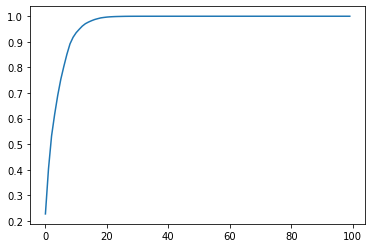

In [96]:
plt.plot(np.cumsum(Σ) / np.sum(Σ))

In [112]:
rank = 10
U, Σ, V = U[:, :rank], Σ[:rank], V[:, :rank]

In [113]:
T = X @ V @ np.diag(1/np.sqrt(Σ))
S = Y @ U @ np.diag(1/np.sqrt(Σ))

In [114]:
Â, B̂, Ĉ = S.T @ A @ T , S.T @ B, C @ T

In [115]:
X̂ = Controlability(Â, B̂)
Ŷ = Observability(Â, Ĉ).T

In [116]:
Σ = svdvals(Y.T @ X)
S = svdvals(Ŷ.T @ X̂)

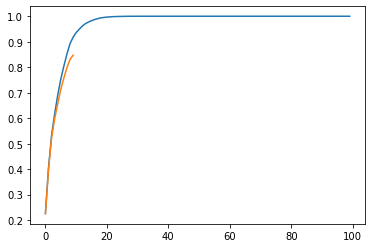

In [117]:
plt.plot(np.cumsum(Σ) / np.sum(Σ))
plt.plot(np.cumsum(S) / np.sum(Σ))

In [118]:
Wo = Y @ Y.T
Wc = X @ X.T

In [119]:
Wx = Wc @ Wo
λ = eigvals(Wx).real

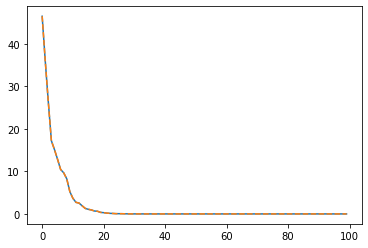

In [120]:
plt.plot(Σ)
plt.plot(np.sqrt(np.abs(λ)), '--')